# <font color=blue>_Scraping Yahoo Finance Articles_.</font>

## Task - Extract press releases from Yahoo Finance
From Yahoo Finance pages, we will extract the title, summary, and URL for articles using both _Beautiful Soup_ and _Selenium_ libraries in python.

## <font color=blue>Step 1: Inspect the Webpage</font>

First let's take a closer look at the webpages we are scraping.  For instance, we can look at Amazon's page:

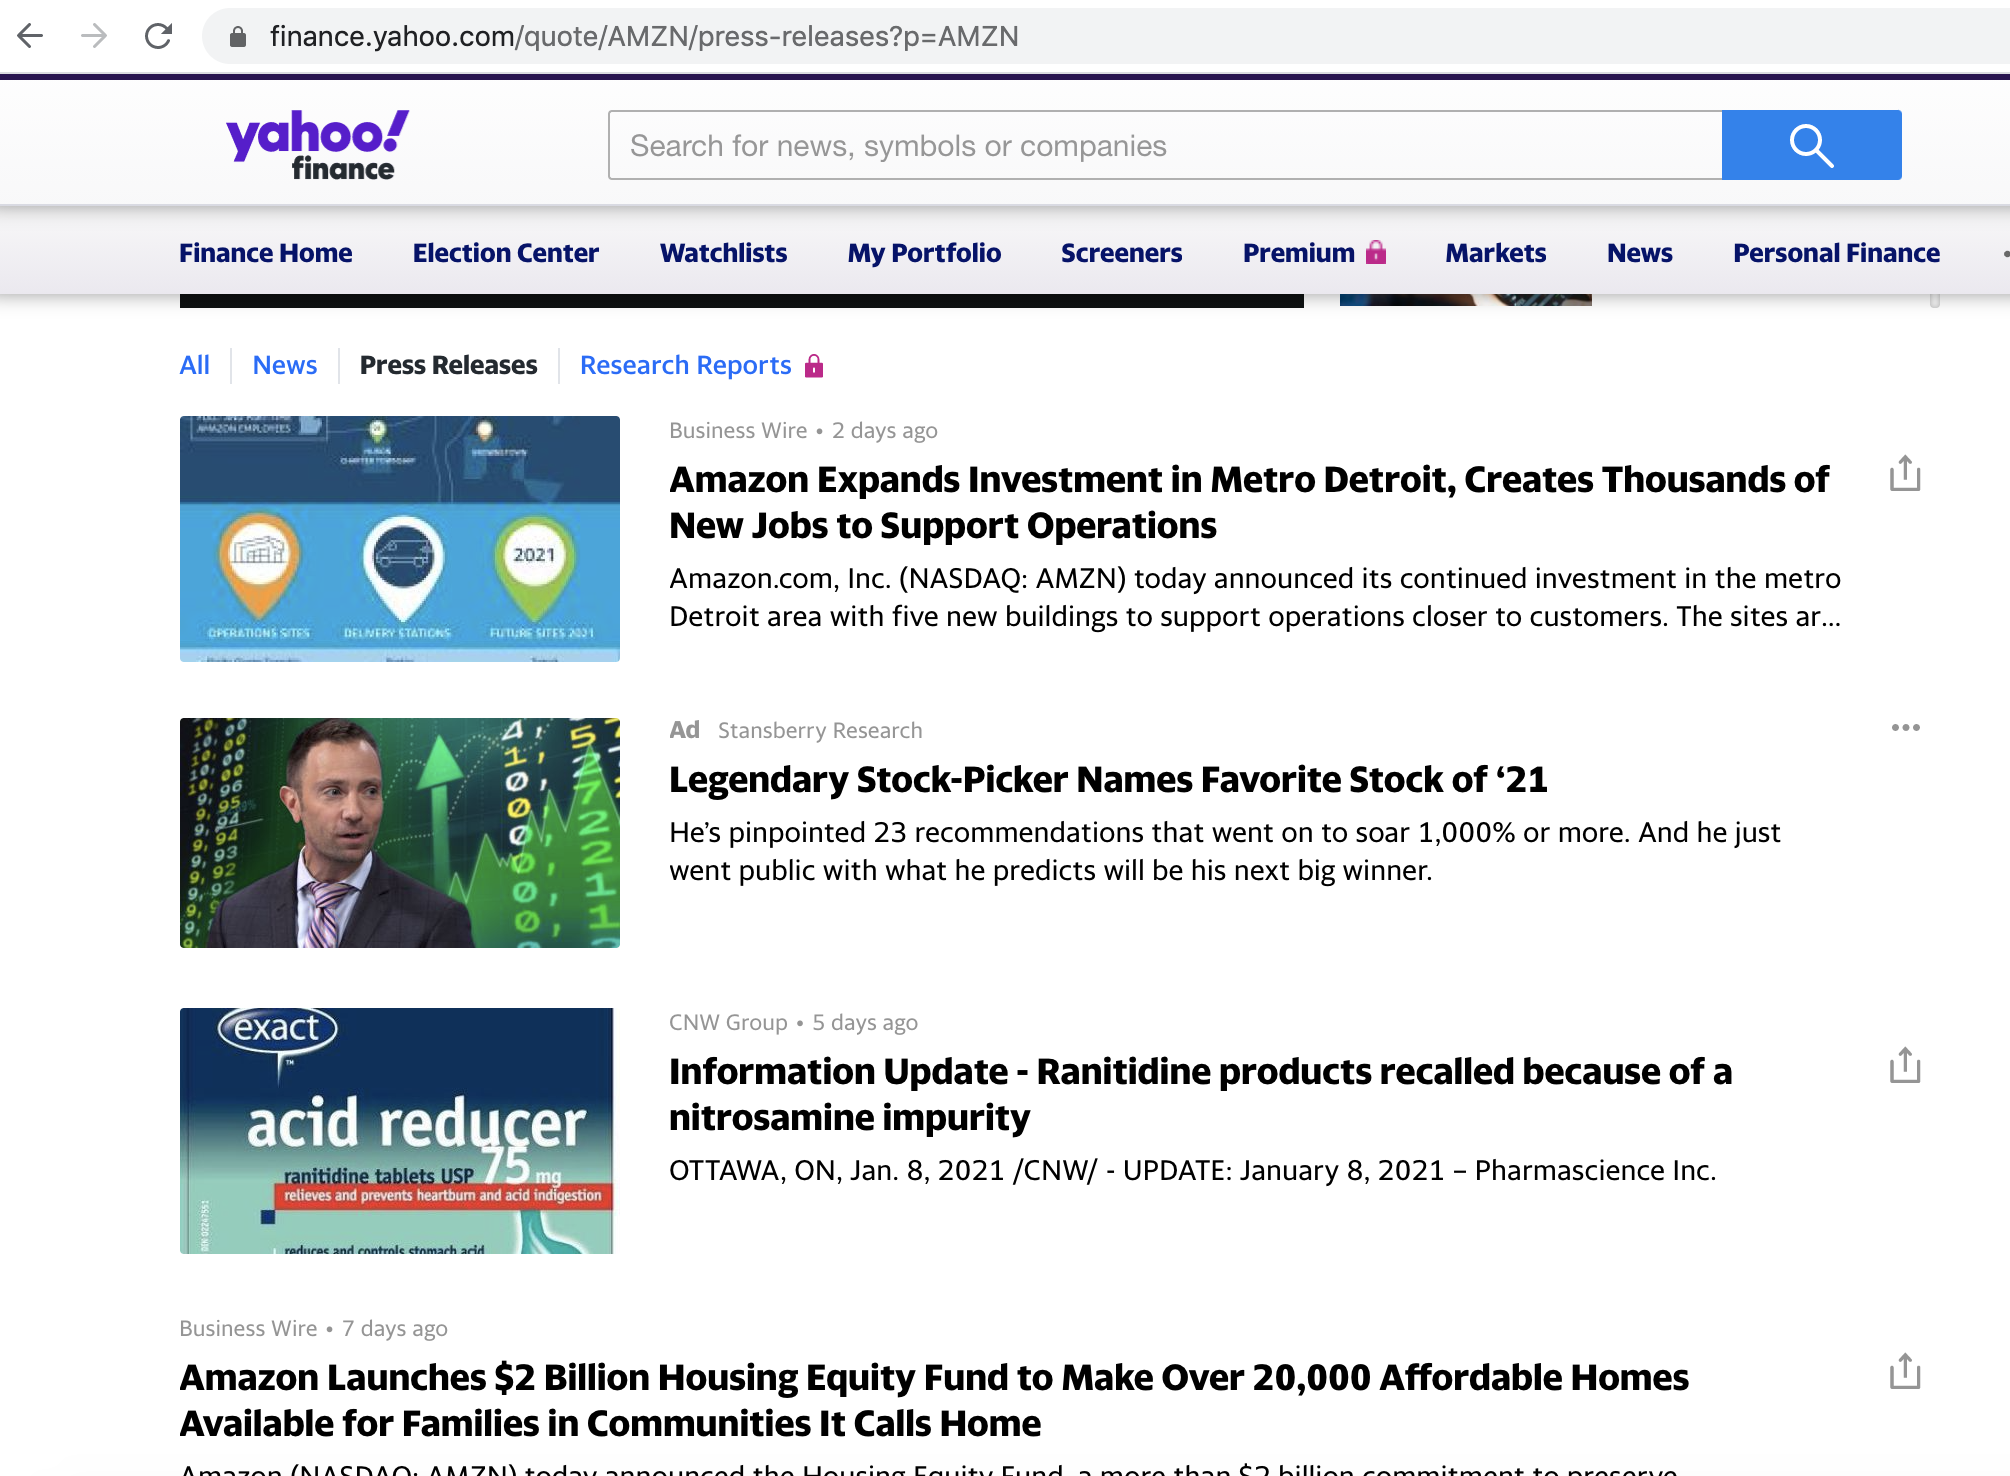

In [2]:
from IPython.display import Image
Image(filename= "image1.png", width=5000, height=5000)

In a Chrome Browser, we can highlight the element we want (an article's weblink), right click, and select __Inspect Element__ or __Inspect__.

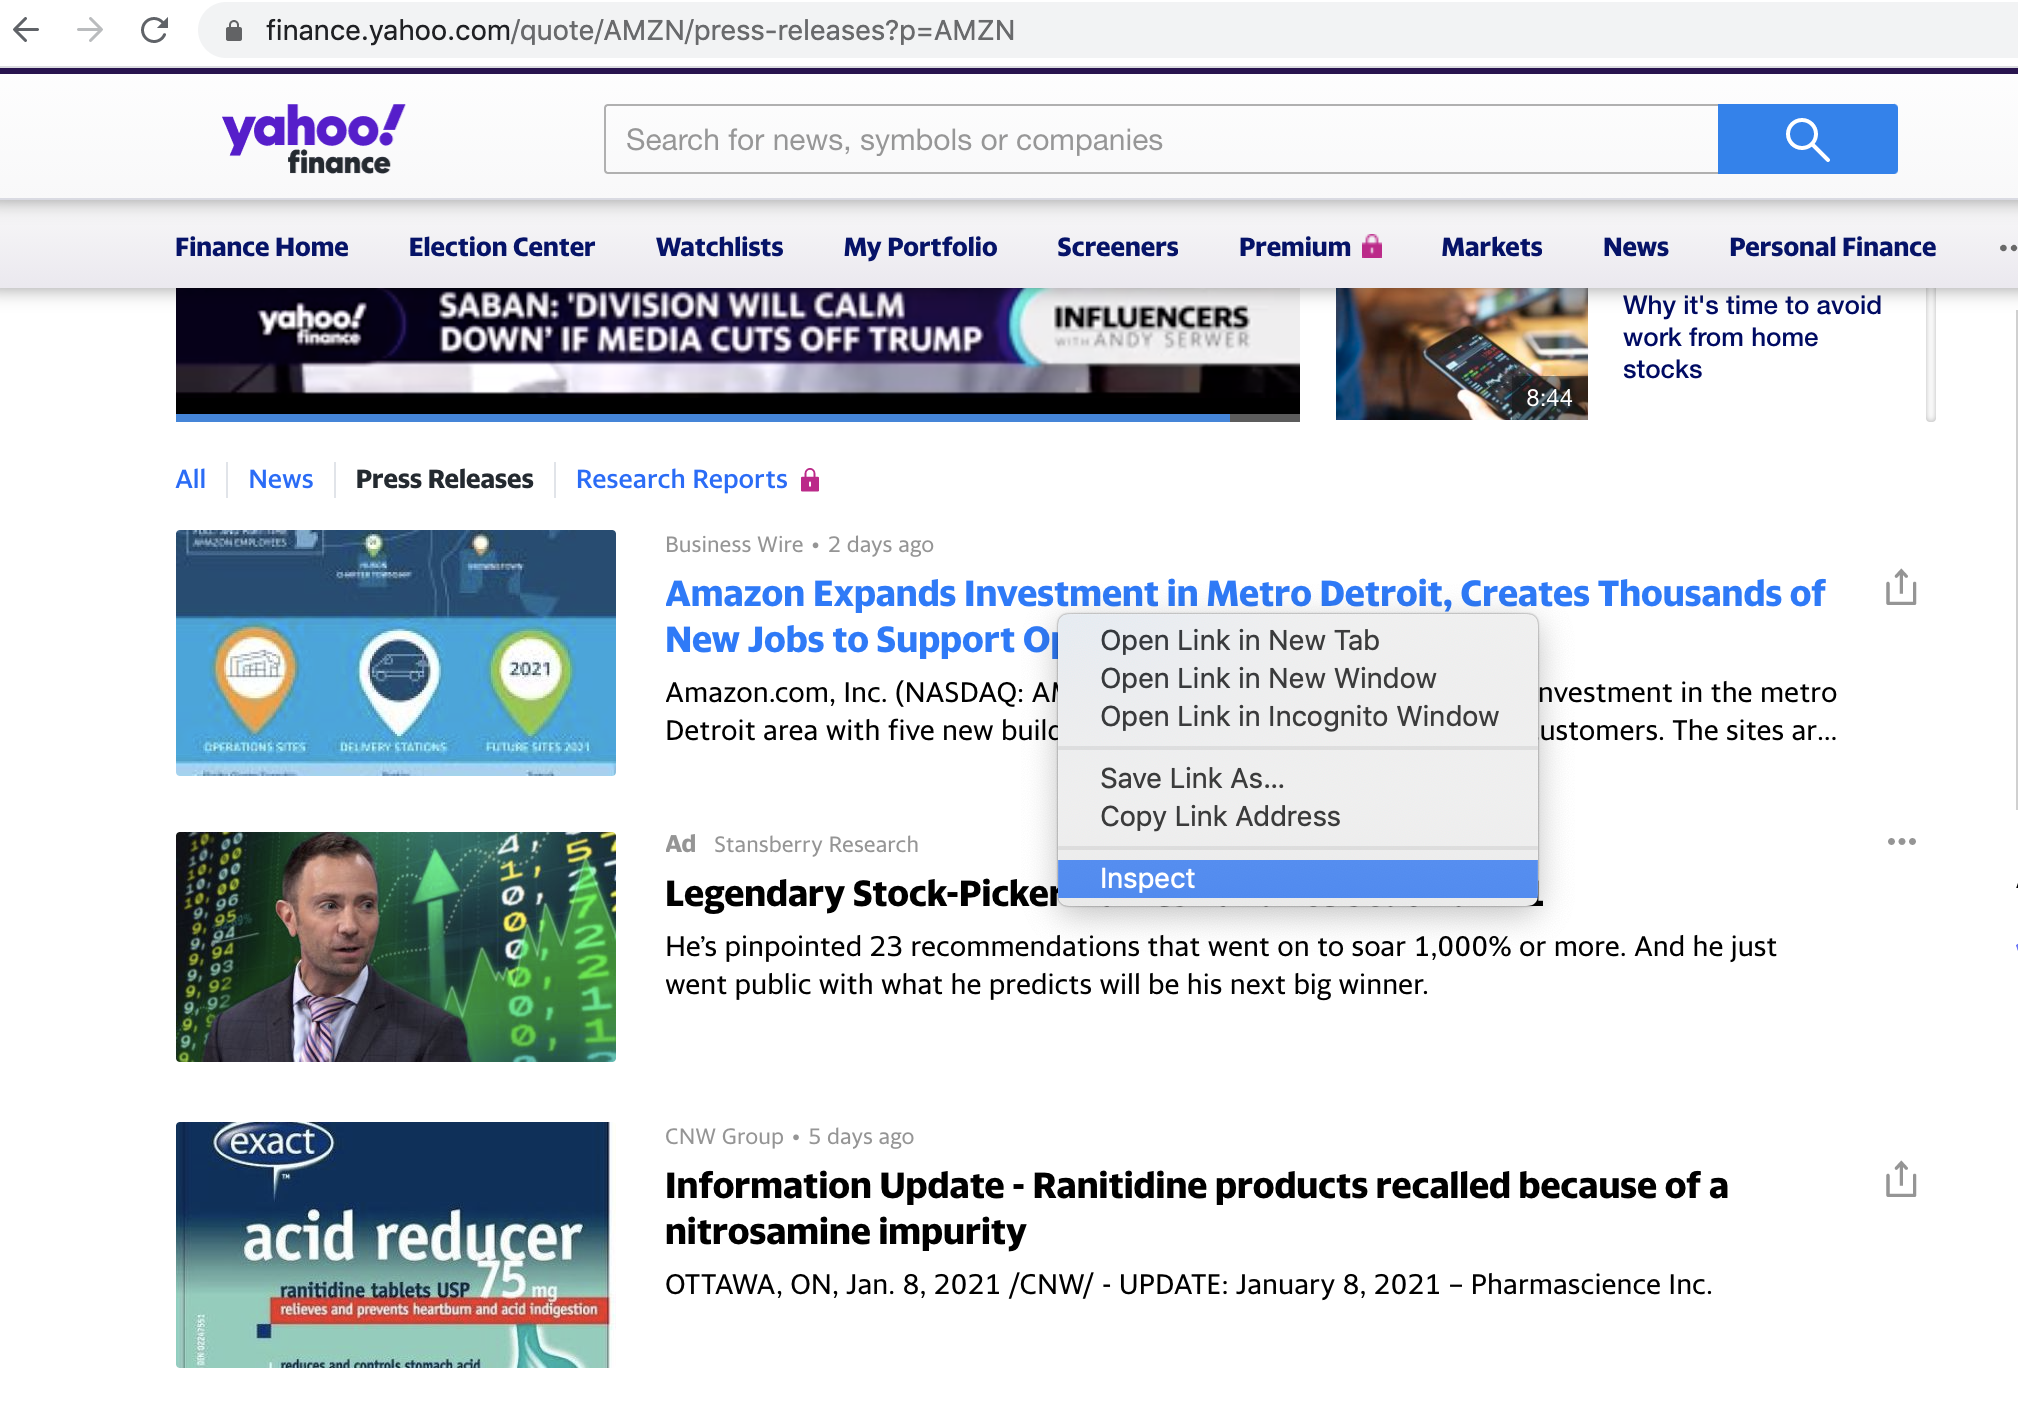

In [3]:
from IPython.display import Image
Image(filename= "image2.png", width=5000, height=5000)

This will take you to Chrome's Developer Tools where you can inspect the html __tags__ and __attributes__ of the element you highlighted.

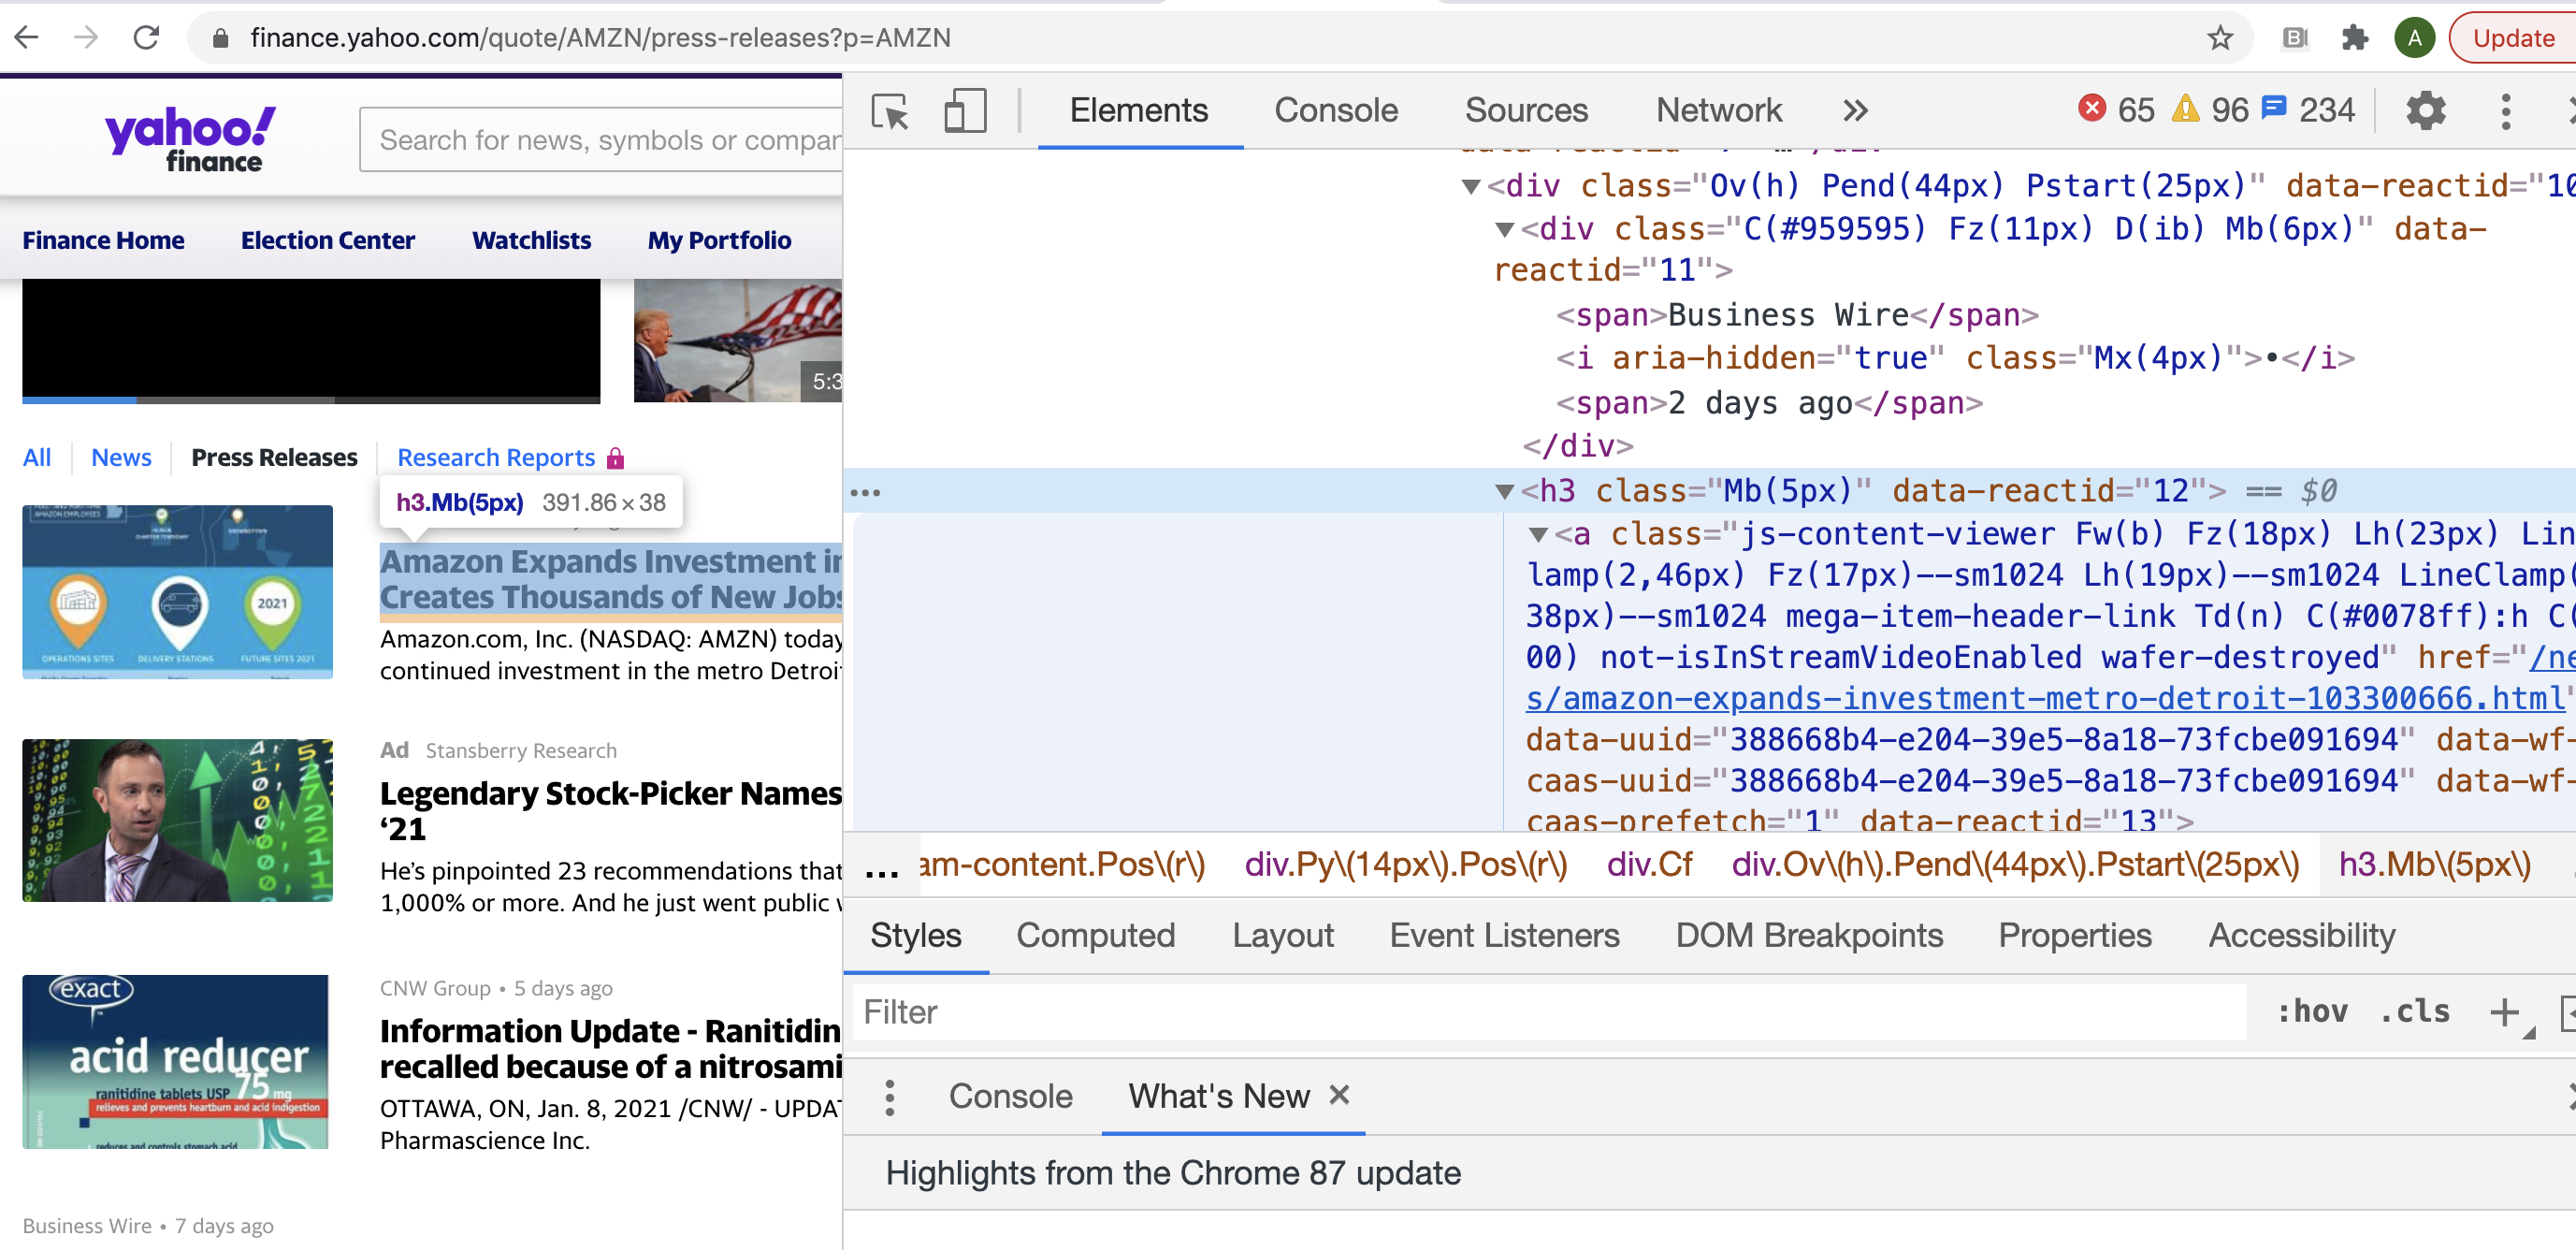

In [4]:
from IPython.display import Image
Image(filename= "image3.png", width=5000, height=5000)

In the Developer Tools, you can see that first article's webpage ("/news/amazon-expands-investment-metro-detroit-103300666.html") can be found within the __href__ attribute of the __&lt;a>__ tag. 

The __&lt;a>__ tag is actually a 'child' tag to the 'parent' __&lt;h3>__ tag with an __id__ attribute and a "Mb(5px)" value.

Note that if you use your mouse to hover over an html tag, it will highlight that element on the webpage. 

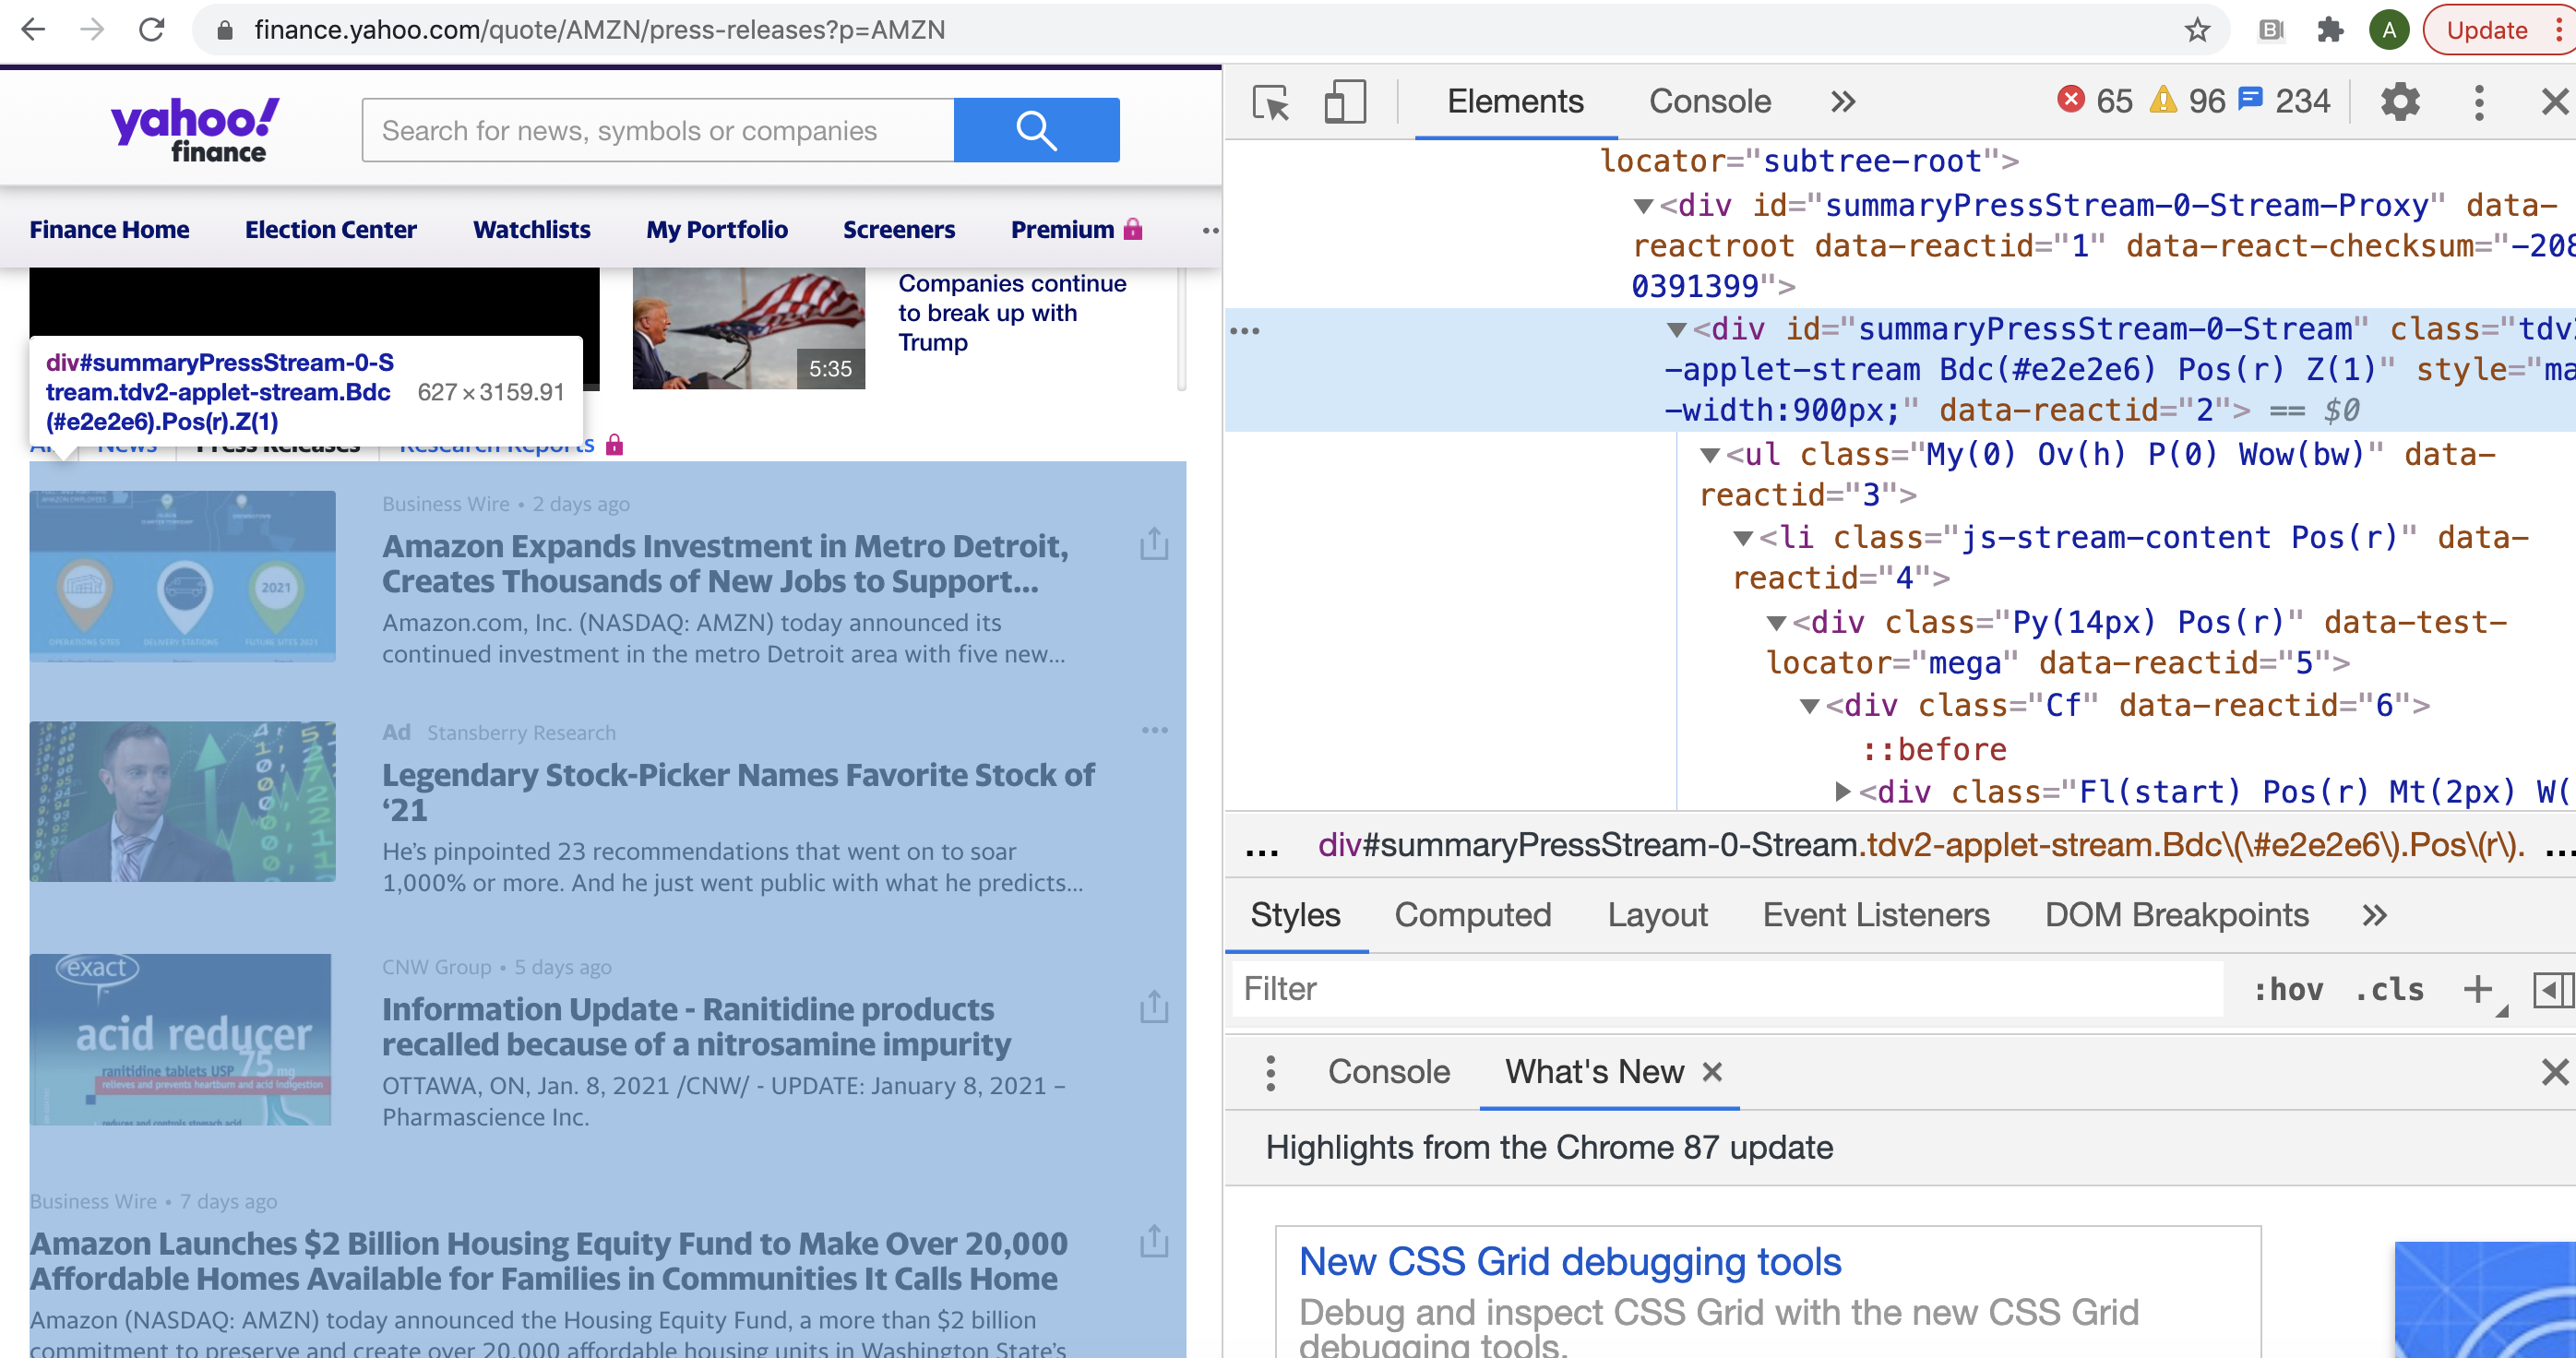

In [5]:
from IPython.display import Image
Image(filename= "image4.png", width=5000, height=5000)

To see the HTML table that contains information for all Amazon articles, we can follow the same steps. The table falls under the __id__ attribute of the __&lt;div>__ tag. (Shown above) 

For more information on understanding the HTML code, see: https://www.tutorialrepublic.com/html-tutorial/


If you further inspect this page, you will notice that the page continues to load information as you scroll down.

In order to load all the articles, we need to click on the __Press Releases__ button and load the entire page.  This is where _selenium_ comes in.

## <font color=blue>Step 2: Using Selenium to Control a Web Browser</font>

### Import Packages
First, we need to load the necessary libraries and file paths.  Note that _selenium_ uses a __geckodriver__ that we have stored on KLC under _/kellogg/bin/_

In [1]:
# here we make sure that we pull libraries from our conda environment
import sys
sys.path.append("~/.conda/envs/harvestNov2020_env/bin/python")

# import library for sleep times
import time

# import BeautifulSoup
import bs4 as bs

# import Pandas
import pandas as pd

# import selenium libraries and options
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
options = Options()
#options.set_headless(headless=True) # if you select this option selenium will run without opening a browser window

Let's load the webpage we are using.

In [2]:
url = 'https://finance.yahoo.com/quote/AMZN/'
print(url)

https://finance.yahoo.com/quote/AMZN/


### Start a Browser Session

Next, we will create a Firefox session that directs _selenium_ to the directory that has the geckodriver and launches the website.  

In [3]:
# create a new Firefox Session
driver = webdriver.Firefox(options=options, executable_path=r'/kellogg/bin/geckodriver')
driver.implicitly_wait(3)

# load the website
driver.get(url)

### Button Clicks

You'll notice that a Firefox browser window opened.  Let's tell _selenium_ to click on the tab for __Press Releases__ to load all articles.

In [4]:
# click open the "More Faculty" button
python_button = driver.find_element_by_link_text('Press Releases')
python_button.click()

We can also use selenium to load all of the press release content on this page: 

In [5]:
# Scroll to the bottom of an Infinitely Loading Page

# load the page
url2 = 'https://finance.yahoo.com/quote/AMZN/press-releases?p=AMZN'
print(url2)
driver.get(url2)
    
SCROLL_PAUSE_TIME = 0.5

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
    
    
#driver.quit()

https://finance.yahoo.com/quote/AMZN/press-releases?p=AMZN


## <font color=blue>Step 3: Use Beautiful Soup to parse the elements</font>

Now let's extract the elements with _Beautiful Soup_.

### Save Source Code
First let's save the source code from _selenium_.
 

In [6]:
# save the source code from Selenium
page_source = driver.page_source

# save to an html file
with open('amzn.html', 'w') as f:
    f.write(driver.page_source)

Now let's transfer that source code to a __soup__ object that _Beautiful Soup_ can use for parsing.

In [7]:
soup = bs.BeautifulSoup(page_source, 'html.parser')
print(soup)

<html class="firefox desktop JsEnabled themelight layoutEnhance(TwoColumnLayout) CollapsibleUh onDemandFocusSupport HideNavrail hasScrolled scrollDown" id="atomic" lang="en-US"><head prefix="og: http://ogp.me/ns#"><!-- Shady DOM styles for fin-streamer --><style>body {transition: opacity ease-in 0.2s; } 
body[unresolved] {opacity: 0; display: block; overflow: hidden; position: relative; } 
</style><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>AMZN 3,324.45 30.45 0.92% : Amazon.com, Inc. - Yahoo Finance</title><meta content="press releases, company headlines,news,latest happenings,latest news,recent news,AMZN, Amazon.com, Inc., AMZN stock chart, Amazon.com, Inc. stock chart, stock chart, stocks, quotes, finance" name="keywords"/><meta content="on" http-equiv="x-dns-prefetch-control"/><meta content="on" property="twitter:dnt"/><meta content="458584288257241" property="fb:app_id"/><meta content="#400090

## Identify an HTML Tag

We could try to use regular expressions on the __soup__ we created, but that could be cumbersome.  Instead, we can use the find method in _Beautiful Soup_ to identify elements in html tags. Using the tags, attributes, and values, we idenfified for the HTML table and the faculty webpages, we can save this data to objects. 

In [8]:
# find the html table with the press releases
press = soup.find('div',{'id':"summaryPressStream-0-Stream"})
articles = press.findAll('div',{'class':"Cf"})

## Inspecting a _Beautiful Soup_ object

Let's look at the attributes of the article table.

In [9]:
print(press.attrs)

{'id': 'summaryPressStream-0-Stream', 'class': ['tdv2-applet-stream', 'Bdc(#e2e2e6)', 'Pos(r)', 'Z(1)'], 'style': 'max-width:900px;', 'data-reactid': '2'}


Let's see how many articles we found for Amazon.

In [10]:
print(len(articles))

13


Lets inspect the first item in the article list.  What does it look like?  What are its associated attributes?

In [11]:
print(articles[0])
print(articles[0].attrs)

<div class="Cf" data-reactid="6"><div class="Ov(h) Pend(14%) Pend(44px)--sm1024" data-reactid="7"><div class="C(#959595) Fz(11px) D(ib) Mb(6px)" data-reactid="8"><span>CNW Group</span><i aria-hidden="true" class="Mx(4px)">•</i><span>9 hours ago</span></div><h3 class="Mb(5px)" data-reactid="9"><a class="js-content-viewer Fw(b) Fz(18px) Lh(23px) LineClamp(2,46px) Fz(17px)--sm1024 Lh(19px)--sm1024 LineClamp(2,38px)--sm1024 mega-item-header-link Td(n) C(#0078ff):h C(#000) not-isInStreamVideoEnabled wafer-destroyed" data-reactid="10" data-uuid="971b6959-1415-3f52-b0cd-c1ce7f514b92" data-wf-caas-prefetch="1" data-wf-caas-uuid="971b6959-1415-3f52-b0cd-c1ce7f514b92" href="/news/mark-hutchinson-lottery-industry-pioneer-130000569.html"><u class="StretchedBox" data-reactid="11"></u><!-- react-text: 12 -->Amazon Future Engineer Launches in Canada to Inspire and Propel Students from Underserved Communities to Build Careers in Computer Science<!-- /react-text --></a></h3><p class="Fz(14px) Lh(19px) 

We can see it contains more information than we need.  Let's extract the webpage for the first article.

In [12]:
# extract the website for the first press release
website = articles[0].find('a', href=True)
website = website['href']
print(website)

/news/mark-hutchinson-lottery-industry-pioneer-130000569.html


## <font color=red>Exercise 1</font>

<font color=red> Extract the first articles's title, source, date, and summary?</font> 

In [16]:
# to find the title
title = articles[0].find('h3', {'class': 'Mb(5px)'})
title = title.text
print(title)

# to find the source
source_all = articles[0].find('div', {'class': 'C(#959595) Fz(11px) D(ib) Mb(6px)'})
source = source_all.find_next('span')
source = source.text
print(source)

# to find the date
time = source_all.find_next('span').find_next('span')
time = time.text
print(time)

# to find the summary
summary = articles[0].find('p', {'class': 'Fz(14px) Lh(19px) Fz(13px)--sm1024 Lh(17px)--sm1024 LineClamp(3,57px) LineClamp(3,51px)--sm1024 M(0)'})
summary = summary.text
print(summary)

Amazon Future Engineer Launches in Canada to Inspire and Propel Students from Underserved Communities to Build Careers in Computer Science
CNW Group
7 hours ago
26, 2021 /CNW/ - (NASDAQ: AMZN)— Amazon today announced the Canadian launch of Amazon Future Engineer, a comprehensive program designed to inspire, educate, and prepare children and young adults from underrepresented and underserved communities to pursue computer science. As part of Amazon's commitment to strengthening the communities it is proud to call home, the company will invest $3 million (CAD) over three years to fund unique computer science learning opportunities for an anticipated 1 million students and teachers across the country.


## Save results to a List Object

In [13]:
# save the full url for the first professor into an empty list object
website = 'https://finance.yahoo.com/' + str(website)
article_sites = []
article_sites.append(website)
print(article_sites)

['https://finance.yahoo.com//news/mark-hutchinson-lottery-industry-pioneer-130000569.html']


## <font color=red>Exercise 2</font>

<font color=red>Save all of article websites into a list object.</font>

In [14]:
# Exercise 2
article_names = []
article_sites = []

for i in articles:
    try:
        title = i.find('h3', {'class': 'Mb(5px)'})
        title = title.text
        print(title)
        article_names.append(title)
        
        website = i.find('a', href=True)
        website = website['href']
        website = 'https://finance.yahoo.com' + str(website)
        print(website)
        article_sites.append(website)
        
    except:
        print("error")


Amazon Future Engineer Launches in Canada to Inspire and Propel Students from Underserved Communities to Build Careers in Computer Science
https://finance.yahoo.com/news/mark-hutchinson-lottery-industry-pioneer-130000569.html
error
Amazon Expands Boston Tech Hub With Plans to Create 3,000 New Jobs
https://finance.yahoo.com/news/amazon-expands-boston-tech-hub-090000161.html
Amazon.com to Webcast Fourth Quarter 2020 Financial Results Conference Call
https://finance.yahoo.com/news/amazon-com-webcast-fourth-quarter-210100873.html
Amazon invests in Quebec to create more than 1,000 new jobs and bring faster delivery to customers with five new facilities
https://finance.yahoo.com/news/bdc-ceo-michael-denham-minister-100000374.html
Amazon Teams Up with Pharrell Williams’ YELLOW and Georgia Tech to Launch New Music Remix Competition to Inspire Students to Pursue Computer Science
https://finance.yahoo.com/news/amazon-teams-pharrell-williams-yellow-140000768.html
error
Amazon Expands Investment i

## <font color=red>Exercise 3</font>

<font color=red>Save the results to a pandas dataframe.</font>

In [15]:
import pandas as pd

article_list = pd.DataFrame(
    {'title': article_names,
     'website': article_sites,
    })

article_list[1:5]

title  \
1  Amazon Expands Boston Tech Hub With Plans to C...   
2  Amazon.com to Webcast Fourth Quarter 2020 Fina...   
3  Amazon invests in Quebec to create more than 1...   
4  Amazon Teams Up with Pharrell Williams’ YELLOW...   

                                             website  
1  https://finance.yahoo.com/news/amazon-expands-...  
2  https://finance.yahoo.com/news/amazon-com-webc...  
3  https://finance.yahoo.com/news/bdc-ceo-michael...  
4  https://finance.yahoo.com/news/amazon-teams-ph...

## Export Results to csv File

In [22]:
# Let's save the results of this variable to a csv file
import csv
with open('article_pages.csv', "w") as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     for site in article_sites:
        wr.writerow([site])

## Close the Chrome Browser

In [16]:
# end browser session
driver.quit()

## <font color=red>Answer Key</font>

In [ ]:
# to find the title
title = articles[0].find('h3', {'class': 'Mb(5px)'})
title = title.text
print(title)

# to find the source
source_all = articles[0].find('div', {'class': 'C(#959595) Fz(11px) D(ib) Mb(6px)'})
source = source_all.find_next('span')
source = source.text
print(source)

# to find the date
time = source_all.find_next('span').find_next('span')
time = time.text
print(time)

# to find the summary
summary = articles[0].find('p', {'class': 'Fz(14px) Lh(19px) Fz(13px)--sm1024 Lh(17px)--sm1024 LineClamp(3,57px) LineClamp(3,51px)--sm1024 M(0)'})
summary = summary.text
print(summary)

In [ ]:
# Exercise 2
article_names = []
article_sites = []

for i in articles:
    try:
        title = i.find('h3', {'class': 'Mb(5px)'})
        title = title.text
        print(title)
        article_names.append(title)
        
        website = i.find('a', href=True)
        website = website['href']
        website = 'https://finance.yahoo.com' + str(website)
        print(website)
        article_sites.append(website)
        
    except:
        print("error")


In [ ]:
import pandas as pd

article_list = pd.DataFrame(
    {'title': article_names,
     'website': article_sites,
    })

article_list[1:5]